# Face Detection Project

# Haarcascade

In [17]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import dlib

(803, 1300, 3)

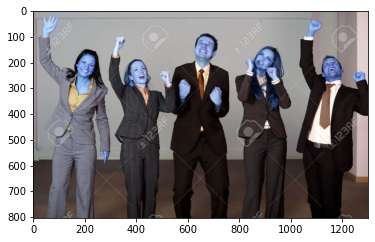

In [18]:
image = cv2.imread(r"D:\python\FaceDetection\Data Set-20221119T043111Z-001\Data Set\people4.jpg")
display (image.shape)
plt.imshow(image)
plt.show()

In [19]:
image = cv2.resize(image, (720,480))#getting good accuracy at this image size and clear hd images
image.shape

(480, 720, 3)

In [20]:
cv2.imshow('FaceDetection', image)
cv2.waitKey(10000)
# cv2.destroyAllWindows() simply destroys all the windows we created.
cv2.destroyAllWindows()


In [6]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('FaceDetection',image_gray)
cv2.waitKey(10000)
cv2.destroyAllWindows()


In [21]:
display (image_gray.shape)

(480, 720)

In [22]:
face_detector = cv2.CascadeClassifier(r"D:\python\FaceDetection\Cascade\haarcascade_frontalface_default.xml")
display (face_detector)


< cv2.CascadeClassifier 0000020327D92730>

In [23]:
detections = face_detector.detectMultiScale(image_gray,scaleFactor=1.04,minNeighbors=5, minSize = (5,5), maxSize = (50,50))#Used scale factor to increase accuracy
display (detections)

array([[347,  60,  43,  43],
       [ 94, 105,  45,  45],
       [621, 108,  40,  40],
       [206, 117,  47,  47]])

In [24]:
for (x, y, w, h) in detections:
  #print (x, y, w, h)
    cv2.rectangle(image_gray, (x, y), (x + w, y + h), (0,255,255), 1)
    
cv2.imshow('Face Detection', image_gray)
cv2.waitKey(10000)
plt.show()
cv2.destroyAllWindows()

#6 faces are detected out of 7 faces in above image.

# Using HOG and Dlib

(803, 1300, 3)

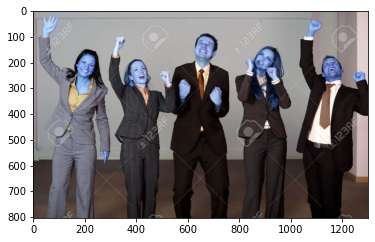

In [25]:
image = cv2.imread(r"D:\python\FaceDetection\Data Set-20221119T043111Z-001\Data Set\people4.jpg")
display (image.shape)
plt.imshow(image)
plt.show()

In [26]:
image = cv2.resize(image, (720,480))#getting good accuracy at this image size and clear hd images
image.shape

(480, 720, 3)

In [27]:
cv2.imshow('FaceDetection', image)
cv2.waitKey(10000)
# cv2.destroyAllWindows() simply destroys all the windows we created.
cv2.destroyAllWindows()


In [28]:
face_detector_hog = dlib.get_frontal_face_detector()
detections = face_detector_hog(image, 5)#increasing scale factor didn't affected  accuracy

In [29]:
display (len(detections))
display (detections)

5

rectangles[[(89, 109) (131, 150)], [(348, 62) (390, 104)], [(209, 122) (251, 164)], [(473, 95) (514, 136)], [(621, 113) (655, 148)]]

In [30]:
for face in detections:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l, t), (r, b),(0,255,0), 2)
cv2.imshow('',image)
cv2.waitKey(10000)
plt.show()
cv2.destroyAllWindows()



# Face detection with CNN and Dlib

In [27]:
cnn_detector = dlib.cnn_face_detection_model_v1("D:\python\FaceDetection\Weights-20221119T072413Z-001\Weights\mmod_human_face_detector.dat")
display (cnn_detector)


In [ ]:
detections = cnn_detector(image, 1)
for face in detections:
    l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
    print(c)
    cv2.rectangle(image, (l, t), (r, b), (255, 255, 0), 2)
cv2.imshow('',image)
cv2.waitKey(10000)
plt.show()
cv2.destroyAllWindows()

